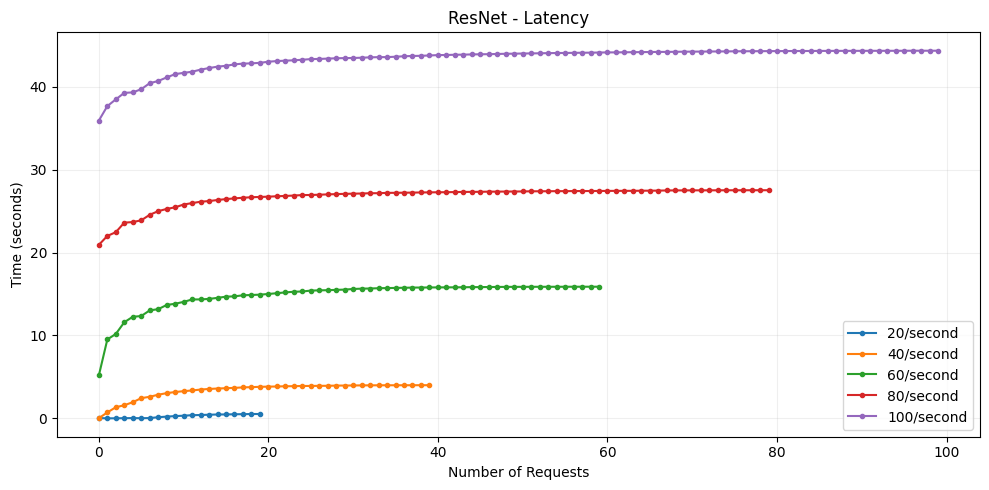

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for num_requests in range(20, 110, 20):
    perf_df = pd.read_csv(f"ResNet_performance_{num_requests}.csv")
    
    perf_df["total_time"] = perf_df["end_time"] - perf_df["start_time"]
    
    plt.plot(perf_df["total_time"], linestyle='-', marker='.', label="{}/second".format(num_requests))

plt.title("ResNet - Latency")
plt.xlabel('Number of Requests')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


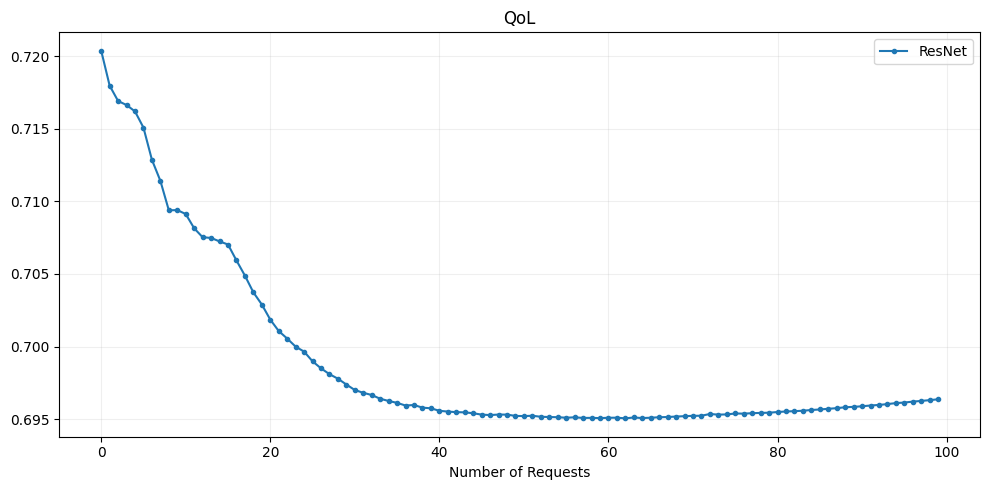

In [66]:
plt.figure(figsize=(10, 5))

perf_df = pd.read_csv(f"ResNet_performance_100.csv")
plt.plot(perf_df["Delay_QoE"], linestyle='-', marker='.', label="ResNet")

# perf_df = pd.read_csv(f"MobileNet_performance_100.csv")
# plt.plot(perf_df["Delay_QoE"], linestyle='-', marker='.', label="MobileNet")

plt.title("QoL")
plt.xlabel('Number of Requests')
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

In [6]:
perf_df = pd.read_csv("performance_20.csv")
perf_df["total_time"] = perf_df["end_time"] - perf_df["start_time"]
perf_df

KeyError: 'start_time'

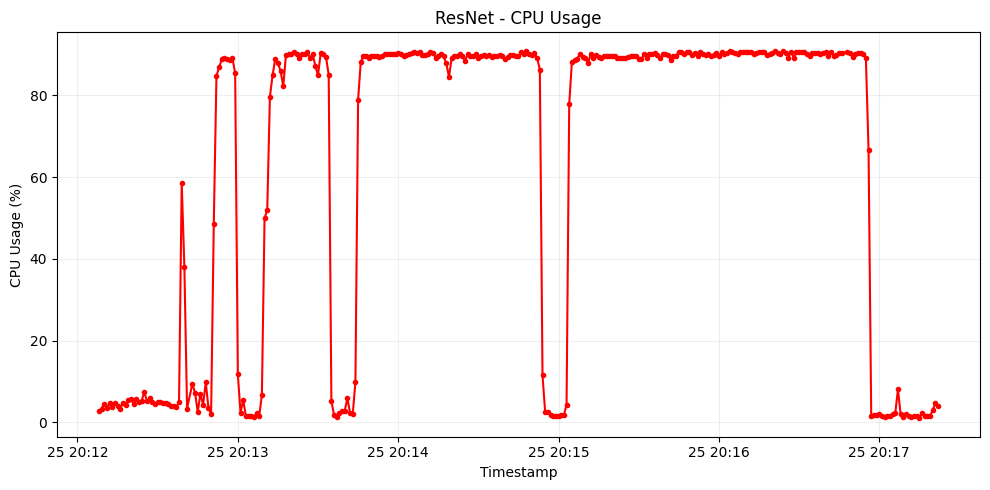

In [48]:
resource_df = pd.read_csv("/Users/neeleshkarthikeyan/ckn-edge/ckn/src/daemon/MobileNet_resource_consumption.csv")
resource_df.columns = ['timestamp', 'cpu_usage_percent', 'memory_usage_percent', 'memory_usage_GB', 'used_drive_gb',
                       'used_drive_percentage', 'power_consumption']
resource_df["timestamp"] = pd.to_datetime(resource_df["timestamp"], errors='coerce')
plt.figure(figsize=(10, 5))
plt.plot(resource_df["timestamp"], resource_df["cpu_usage_percent"], linestyle='-', marker='.', color='r',
         label="CPU Usage")
# plt.plot(df["wait_time"], linestyle='--', marker='x', color='g', label="Wait Time")
# plt.plot(df["latency"], linestyle='-.', marker='s', color='r', label="Latency")
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage (%)')
plt.title('ResNet - CPU Usage')
# plt.legend()
plt.tight_layout()
plt.grid(alpha=0.2)
plt.show()
# 
# perf_df['timestamp'] = perf_df['timestamp'].dt.floor('s')

# perf_aggregated = perf_df.groupby('timestamp').agg({
#     'compute_time': 'mean'
# }).reset_index()
# 
# merged_df = pd.merge(resource_df, perf_aggregated, on='timestamp', how='inner')
# 
# plt.figure(figsize=(12, 6))
# plt.plot(merged_df["timestamp"], merged_df["compute_time"], linestyle='-', marker='o', color='b',
#          label="Latency (seconds)")
# plt.plot(merged_df["timestamp"], merged_df["cpu_usage_percent"], linestyle='-', marker='o', color='r',
#          label="CPU Usage (%)")
# plt.xlabel('Timestamp')
# plt.legend()
# plt.tight_layout()
# plt.show()
# 
# merged_df

In [3]:
import pandas as pd
import time as tm
from datetime import datetime
from random import uniform
from matplotlib import pyplot as plt

accuracies = []
delays = []
start_time = tm.time()

lower_acc_counter = 0
higher_lat_counter = 0
mean_acc = [0.9, 0.1, 0.9, 0.9, 0.9, 0.1, 0.1, 0.9, 0.1, 0.9,
            0.9]  # [0.82, 0.67, 0.82, 0.82, 0.67, 0.82, 0.67, 0.67, 0.82, 0.82, 0.82]
mean_lat = [0.1, 0.01, 0.1, 0.01, 0.01, 0.1, 0.01, 0.01, 0.1, 0.01, 0.1,
            0.1]  # [0.2, 0.1, 0.2, 0.2, 0.1, 0.2, 0.1, 0.1, 0.2, 0.2, 0.2]

start_time = tm.time()
while tm.time() - start_time < 12:
    current_time = tm.time() - start_time
    cycle_index = int(current_time // 0.5) % len(mean_acc)

    req_acc = mean_acc[cycle_index]
    req_lat = mean_lat[cycle_index]

    req_accuracy = uniform(req_acc * 0.995, req_acc * 1.005)
    req_lat = uniform(req_lat * 0.995, req_lat * 1.005)

    added_time = datetime.now()
    accuracies.append(req_accuracy)
    delays.append(req_lat)
    tm.sleep(0.05)

data = {
    'req_accuracy': accuracies,
    'req_lat': delays,
    'EDGE': ['EDGE-1'] * len(accuracies),
    'application': ['imagenet_image_classification'] * len(accuracies),
    'device': ['raspi-1'] * len(accuracies),
    'added_time': [datetime.now().isoformat()] * len(accuracies)
}

df = pd.DataFrame(data)
df.to_csv('ckn/src/device/data/server1.csv', index=False, header=True)
df

KeyboardInterrupt: 

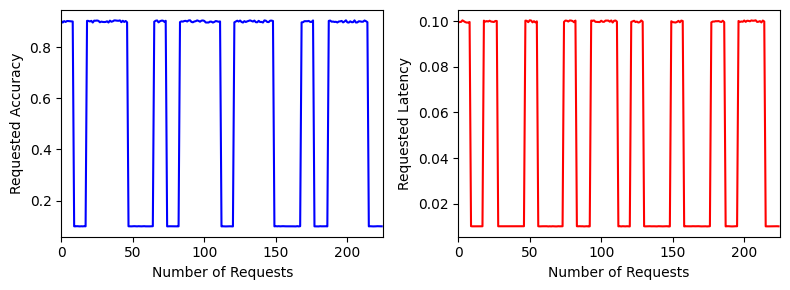

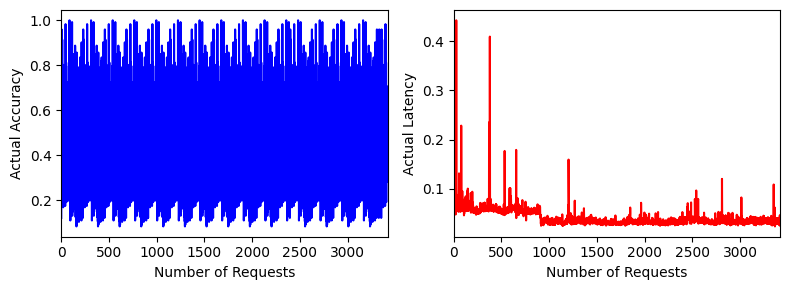

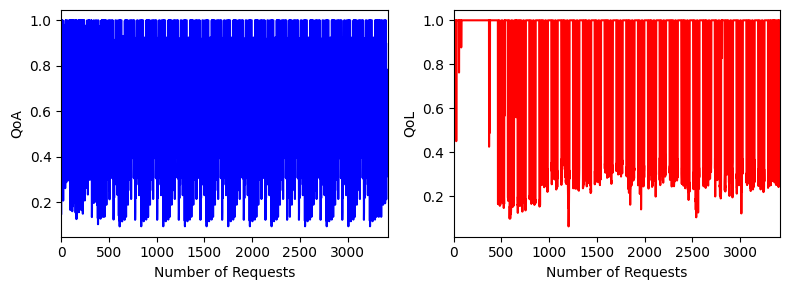

NameError: name 'np' is not defined

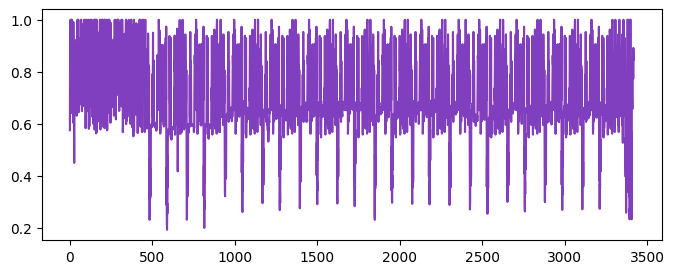

In [3]:
import pandas as pd


def plot_metrics(requests, results):
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.plot(requests["req_accuracy"], linestyle='-', color='b')
    plt.xlabel('Number of Requests')
    plt.ylabel('Requested Accuracy')
    plt.xlim(0, len(requests["req_accuracy"]))

    plt.subplot(1, 2, 2)
    plt.plot(requests["req_lat"], linestyle='-', color='r')
    plt.xlabel('Number of Requests')
    plt.ylabel('Requested Latency')
    plt.xlim(0, len(requests["req_lat"]))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.plot(results["pred_accuracy"], linestyle='-', color='b')
    plt.xlabel('Number of Requests')
    plt.ylabel('Actual Accuracy')
    plt.xlim(0, len(results["pred_accuracy"]))

    plt.subplot(1, 2, 2)
    plt.plot(results["compute_time"], linestyle='-', color='r')
    plt.xlabel('Number of Requests')
    plt.ylabel('Actual Latency')
    plt.xlim(0, len(results["compute_time"]))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.plot(results["accuracy_qoe"], linestyle='-', color='b')
    plt.xlabel('Number of Requests')
    plt.ylabel('QoA')
    plt.xlim(0, len(results["accuracy_qoe"]))

    plt.subplot(1, 2, 2)
    plt.plot(results["delay_qoe"], linestyle='-', color='r')
    plt.xlabel('Number of Requests')
    plt.ylabel('QoL')
    plt.xlim(0, len(results["delay_qoe"]))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 3))
    plt.plot(results["total_qoe"], linestyle='-', color='red', alpha=0.5)
    plt.plot(results["total_qoe"], linestyle='-', color='blue', alpha=0.5)
    plt.hlines(np.mean(results["total_qoe"]), linestyle='-', color='black', xmin=0, xmax=len(results["total_qoe"]))
    plt.xlabel('Number of Requests')
    plt.ylabel('QoE')
    plt.xlim(0, len(results["total_qoe"]))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 3))
    plt.plot(results["cpu_usage_percent"], linestyle='-', color='green')
    plt.plot(results["memory_usage_percent"], linestyle='-', color='orange')
    plt.hlines(np.mean(results["cpu_usage_percent"]), linestyle='-', color='green', xmin=0,
               xmax=len(results["cpu_usage_percent"]))
    plt.hlines(np.mean(results["memory_usage_percent"]), linestyle='-', color='orange', xmin=0,
               xmax=len(results["memory_usage_percent"]))
    plt.xlabel('Number of Requests')
    plt.ylabel('Percentage')
    plt.xlim(0, len(results["total_qoe"]))
    plt.tight_layout()
    plt.legend(["CPU Usage", "Memory"])
    plt.show()


requests_df = pd.read_csv("/Users/neeleshkarthikeyan/ckn-edge/ckn/src/device/data/server1.csv")
results_df = pd.read_csv("/Users/neeleshkarthikeyan/ckn-edge/ckn/src/daemon/QoE_MobileNetV3.csv")
plot_metrics(requests_df, results_df)


In [ ]:
import np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
devices = ['raspi-1', 'raspi-2', 'raspi-3', 'raspi-4', 'raspi-5']
data = org_data[:3000]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# First subplot for individual devices
for device in devices:
    device_data = data[data["Device"] == device]["Requested Accuracy"]
    axs[0].scatter(device_data.index, device_data, label=device)
axs[0].legend(title="Device")
axs[0].set_xlabel('Number of requests')
axs[0].set_ylabel('Accuracy')
plt.tight_layout()
plt.ylim(0, 1)

# Second subplot for overall data
axs[1].plot(data["Requested Accuracy"])
axs[1].set_xlabel('Number of requests')
axs[1].set_ylabel('Accuracy')
plt.title("Workload for Server-1")
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

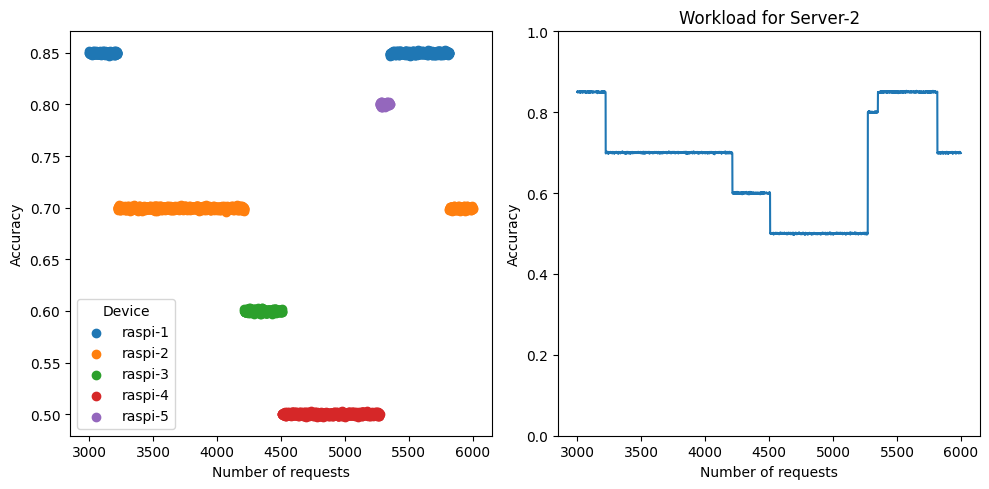

In [3]:
devices = ['raspi-1', 'raspi-2', 'raspi-3', 'raspi-4', 'raspi-5']
data = org_data[3000:6000]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# First subplot for individual devices
for device in devices:
    device_data = data[data["Device"] == device]["Requested Accuracy"]
    axs[0].scatter(device_data.index, device_data, label=device)
axs[0].legend(title="Device")
axs[0].set_xlabel('Number of requests')
axs[0].set_ylabel('Accuracy')
plt.tight_layout()
plt.ylim(0, 1)

# Second subplot for overall data
axs[1].plot(data["Requested Accuracy"])
axs[1].set_xlabel('Number of requests')
axs[1].set_ylabel('Accuracy')
plt.title("Workload for Server-2")
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

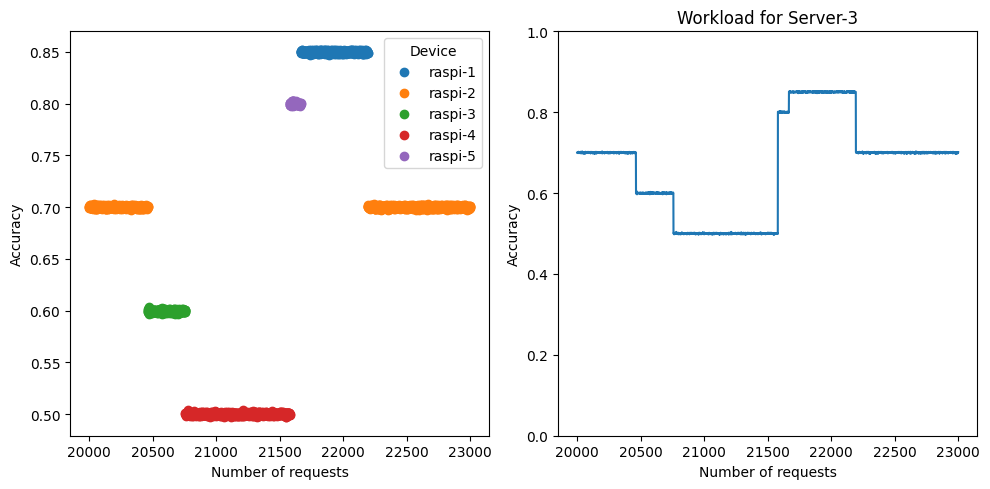

In [4]:
devices = ['raspi-1', 'raspi-2', 'raspi-3', 'raspi-4', 'raspi-5']
data = org_data[20000:23000]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# First subplot for individual devices
for device in devices:
    device_data = data[data["Device"] == device]["Requested Accuracy"]
    axs[0].scatter(device_data.index, device_data, label=device)
axs[0].legend(title="Device")
axs[0].set_xlabel('Number of requests')
axs[0].set_ylabel('Accuracy')
plt.tight_layout()
plt.ylim(0, 1)

# Second subplot for overall data
axs[1].plot(data["Requested Accuracy"])
axs[1].set_xlabel('Number of requests')
axs[1].set_ylabel('Accuracy')
plt.title("Workload for Server-3")
plt.tight_layout()
plt.ylim(0, 1)
plt.show()

In [196]:
org_data[0:3000].to_csv("/Users/neeleshkarthikeyan/ckn-edge/ckn/src/device/data/server1_data.csv", index=False)
org_data[3000:6000].to_csv("/Users/neeleshkarthikeyan/ckn-edge/ckn/src/device/data/server2_data.csv", index=False)
org_data[6000:9000].to_csv("/Users/neeleshkarthikeyan/ckn-edge/ckn/src/device/data/server3_data.csv", index=False)

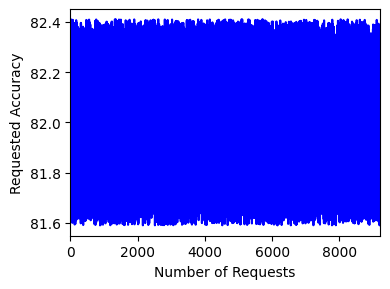

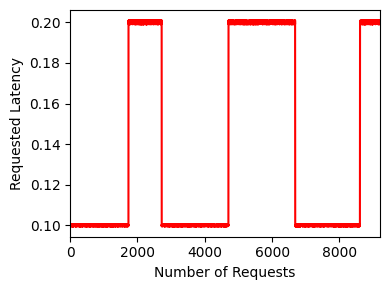

In [26]:
import time as tm
from datetime import datetime
from random import uniform
from matplotlib import pyplot as plt

accuracies = []
delays = []

# Defining high and low swap values for accuracy and latency
mean_acc = [0.82, 0.82, 0.67, 0.82, 0.82, 0.67, 0.67, 0.82, 0.82, 0.67]
mean_lat = [0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.2, 0.1]

high_acc, low_acc = 82, 67
high_lat, low_lat = 0.2, 0.1

# Swapping low and high values
swapped_acc = [low_acc if x == high_acc else high_acc for x in mean_acc]
swapped_lat = [low_lat if x == high_lat else high_lat for x in mean_lat]

start_time = tm.time()
while tm.time() - start_time < 12:
    current_time = tm.time() - start_time
    cycle_index = int(current_time // 1.25) % len(swapped_acc)

    req_accuracy = uniform(swapped_acc[cycle_index] * 0.995, swapped_acc[cycle_index] * 1.005)
    req_delay = uniform(swapped_lat[cycle_index] * 0.995, swapped_lat[cycle_index] * 1.005)

    accuracies.append(req_accuracy)
    delays.append(req_delay)
    tm.sleep(0.001)

# Plotting the accuracies
plt.figure(figsize=(4, 3))
plt.plot(accuracies, linestyle='-', color='b')
plt.xlabel('Number of Requests')
plt.ylabel('Requested Accuracy')
plt.xlim(0, len(accuracies))
plt.tight_layout()
# plt.grid(True)
plt.show()

# Plotting the delays
plt.figure(figsize=(4, 3))
plt.plot(delays, linestyle='-', color='r')
plt.xlabel('Number of Requests')
plt.ylabel('Requested Latency')
plt.xlim(0, len(delays))
plt.tight_layout()
# plt.grid(True)
plt.show()


In [27]:
import pandas as pd

# Create a DataFrame with the gathered data
data = {
    'req_accuracy': accuracies,
    'req_lat': delays,
    'EDGE': ['EDGE-1'] * len(accuracies),
    'application': ['imagenet_image_classification'] * len(accuracies),
    'device': ['raspi-1'] * len(accuracies),
    'added_time': [datetime.now().isoformat()] * len(accuracies)  # Use a fixed time for simplicity
}

df = pd.DataFrame(data)
df

file_path = '/Users/neeleshkarthikeyan/ckn-edge/ckn/src/device/data/server1.csv'
df.to_csv(file_path, index=False, header=False)

In [28]:
df

,req_accuracy,req_lat,EDGE,application,device,added_time
0,82.317834,0.099553,EDGE-1,imagenet_image_classification,raspi-1,2024-04-19T15:15:24.771790
1,82.178714,0.099818,EDGE-1,imagenet_image_classification,raspi-1,2024-04-19T15:15:24.771790
2,81.680859,0.099758,EDGE-1,imagenet_image_classification,raspi-1,2024-04-19T15:15:24.771790
3,82.386534,0.100367,EDGE-1,imagenet_image_classification,raspi-1,2024-04-19T15:15:24.771790
4,81.896533,0.099586,EDGE-1,imagenet_image_classification,raspi-1,2024-04-19T15:15:24.771790
...,...,...,...,...,...,...
9202,81.590065,0.200773,EDGE-1,imagenet_image_classification,raspi-1,2024-04-19T15:15:24.771790
9203,82.191712,0.199087,EDGE-1,imagenet_image_classification,raspi-1,2024-04-19T15:15:24.771790
9204,82.303112,0.199592,EDGE-1,imagenet_image_classification,raspi-1,2024-04-19T15:15:24.771790
9205,82.134428,0.200525,EDGE-1,imagenet_image_classification,raspi-1,2024-04-19T15:15:24.771790


In [35]:
mobilenet = pd.read_csv("/Users/neeleshkarthikeyan/ckn-edge/ckn/src/daemon/QoE_MobileNetV3.csv")
mobilenet.columns = ['server_id', 'service_id', 'client_id', 'prediction', 'compute_time', 'pred_accuracy', 'total_qoe',
                     'accuracy_qoe', 'delay_qoe', 'req_acc', 'req_delay', 'model', 'added_time']

mobilenet

,server_id,service_id,client_id,prediction,compute_time,pred_accuracy,total_qoe,accuracy_qoe,delay_qoe,req_acc,req_delay,model,added_time
0,EDGE-1,imagenet_image_classification,raspi-1,tabby,0.042074,0.646832,0.895558,0.791115,1.0,0.817620,0.199096,MobileNet,2024-04-19T15:19:22.547236
1,EDGE-1,imagenet_image_classification,raspi-1,tabby,0.038350,0.732873,0.947937,0.895874,1.0,0.818053,0.199884,MobileNet,2024-04-19T15:19:22.547236
2,EDGE-1,imagenet_image_classification,raspi-1,Persian cat,0.038968,0.416635,0.754434,0.508869,1.0,0.818746,0.200325,MobileNet,2024-04-19T15:19:22.547236
3,EDGE-1,imagenet_image_classification,raspi-1,Persian cat,0.038687,0.959101,1.000000,1.000000,1.0,0.817719,0.200449,MobileNet,2024-04-19T15:19:22.547236
4,EDGE-1,imagenet_image_classification,raspi-1,tabby,0.038163,0.391291,0.737824,0.475648,1.0,0.822648,0.200911,MobileNet,2024-04-19T15:19:22.547236
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,EDGE-1,imagenet_image_classification,raspi-1,Lhasa,0.040331,0.188103,0.614757,0.229514,1.0,0.819572,0.199551,shufflenet_v2_x0_5,2024-04-19T15:19:22.547236
9995,EDGE-1,imagenet_image_classification,raspi-1,Labrador retriever,0.039378,0.834706,1.000000,1.000000,1.0,0.818827,0.200368,shufflenet_v2_x0_5,2024-04-19T15:19:22.547236
9996,EDGE-1,imagenet_image_classification,raspi-1,German shepherd,0.044208,0.311182,0.689938,0.379877,1.0,0.819167,0.199452,shufflenet_v2_x0_5,2024-04-19T15:19:22.547236
9997,EDGE-1,imagenet_image_classification,raspi-1,Rottweiler,0.044167,0.628975,0.882290,0.764581,1.0,0.822640,0.199706,shufflenet_v2_x0_5,2024-04-19T15:19:22.547236


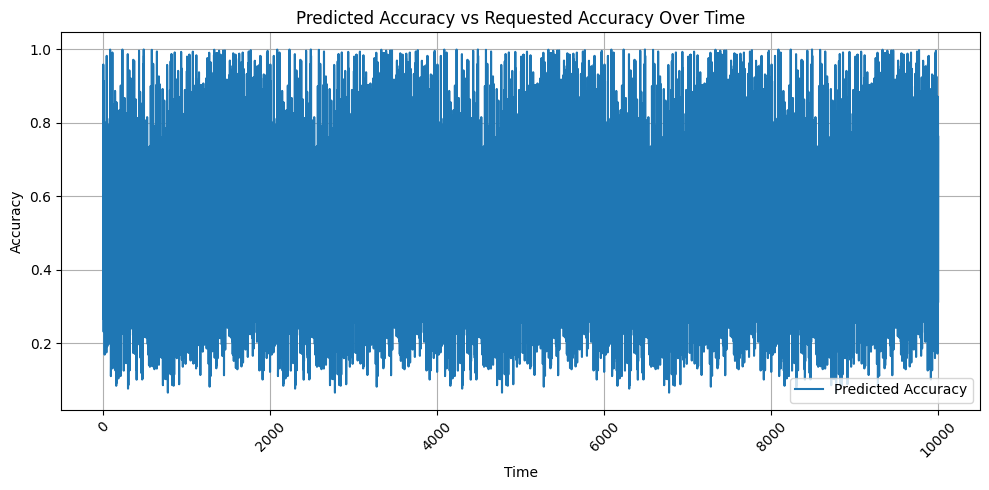

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(mobilenet['pred_accuracy'], label='Predicted Accuracy')
plt.title('Predicted Accuracy vs Requested Accuracy Over Time')
plt.xlabel('Time')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

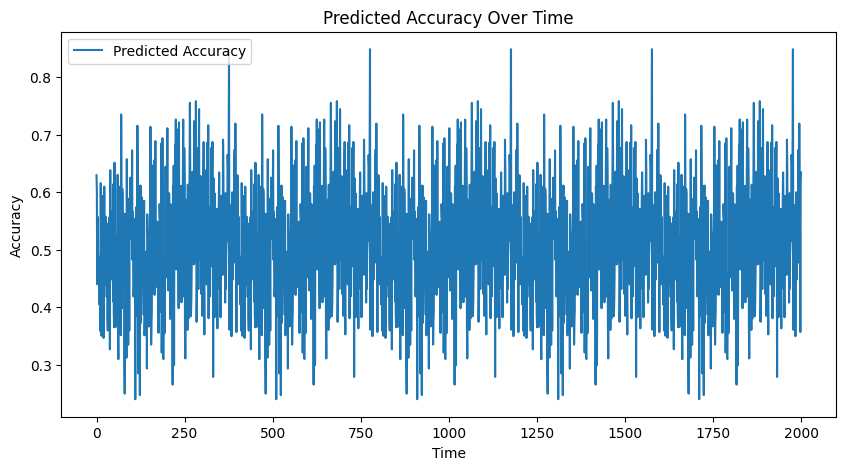

In [49]:
import numpy as np

# Initialize a list to hold the average predicted accuracies for each segment
pred_acc = []

# Define the number of rows per segment
rows_per_segment = 5

# Calculate the number of full segments and the remainder
num_segments = len(mobilenet) // rows_per_segment
remainder = len(mobilenet) % rows_per_segment

# Loop through each segment
for i in range(num_segments):
    start_index = i * rows_per_segment
    end_index = start_index + rows_per_segment
    segment_mean = np.mean(mobilenet['pred_accuracy'][start_index:end_index])
    pred_acc.append(segment_mean)

# Handle the final segment if there is a remainder
if remainder > 0:
    start_index = num_segments * rows_per_segment
    end_index = start_index + remainder
    segment_mean = np.mean(mobilenet['pred_accuracy'][start_index:end_index])
    pred_acc.append(segment_mean)

plt.figure(figsize=(10, 5))
plt.plot(pred_acc, label='Predicted Accuracy')
plt.title('Predicted Accuracy Over Time')
plt.xlabel('Time')
plt.ylabel('Accuracy')
plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


In [54]:
print(np.mean(mobilenet["pred_accuracy"]))
print(np.mean(mobilenet["compute_time"]))


0.5085875065003422
0.04010355230545633


In [56]:
resource = pd.read_csv("/Users/neeleshkarthikeyan/ckn-edge/ckn/src/daemon/resource_consumption.csv")
resource.columns = ['timestamp', 'cpu_usage_percent', 'memory_usage_percent', 'memory_usage_GB', 'used_drive_gb',
                    'used_drive_percentage', 'power_consumption']
resource

,timestamp,cpu_usage_percent,memory_usage_percent,memory_usage_GB,used_drive_gb,used_drive_percentage,power_consumption
0,2024-04-19 15:21:55,27.1,5.955658,73.2,1376.10799,0.164581,50W
1,2024-04-19 15:22:00,27.2,6.023468,73.7,1376.10799,0.164819,50W
2,2024-04-19 15:22:05,27.5,5.948364,73.2,1376.10799,0.165035,50W
3,2024-04-19 15:22:10,39.4,4.760605,65.0,1376.10799,0.165852,50W
4,2024-04-19 15:22:15,36.6,5.938156,70.5,1376.10799,0.165852,50W
...,...,...,...,...,...,...,...
151,2024-04-19 15:36:20,31.8,7.654160,62.5,1376.10799,0.165834,50W
152,2024-04-19 15:36:25,19.6,7.644226,62.5,1376.10799,0.165835,50W
153,2024-04-19 15:36:30,22.3,7.668839,62.6,1376.10799,0.165857,50W
154,2024-04-19 15:36:35,29.6,7.668945,62.5,1376.10799,0.165857,50W


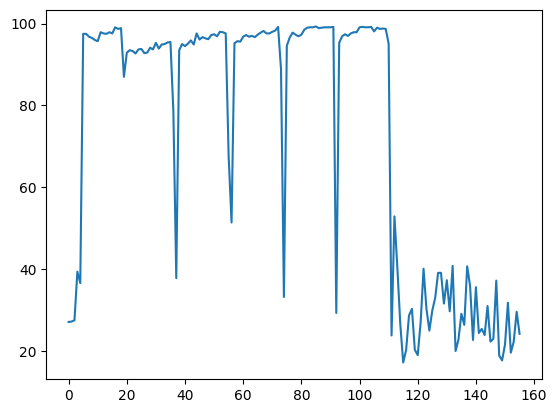

In [58]:
plt.plot(resource["cpu_usage_percent"])

73.16858974358973

In [61]:
resource_trunc = resource[:120]
np.mean(resource_trunc["cpu_usage_percent"])

86.55250000000001

In [5]:
from flask import Flask
import requests
import threading
import time

app = Flask(__name__)


def send_requests(url, rate, duration):
    """Send requests at a defined rate to the specified URL for a certain duration."""

    def target():
        end_time = time.time() + duration
        num_requests = rate * duration
        for _ in range(num_requests):
            if time.time() > end_time:
                break
            requests.get(url)  # Adjust to post or another method as needed
            time.sleep(1 / rate)

    threading.Thread(target=target).start()


@app.route('/start_requests')
def start_requests():
    url = "http://localhost:8080"
    rate = 100  # Requests per second
    duration = 1  # Duration in seconds for which to send requests
    send_requests(url, rate, duration)
    return "Requests are being sent!"


if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/neeleshkarthikeyan/ckn-edge/venv/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/neeleshkarthikeyan/ckn-edge/venv/lib/python3.12/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/Users/neeleshkarthikeyan/ckn-edge/venv/lib/python3.12/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/neeleshkarthikeyan/ckn-edge/venv/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 692, in initialize
    self.init_sockets()
  File "/Users/neeleshkarthikeyan/ckn-edge/venv/lib/python3.12/site-packages/ipykernel/kernelapp.py",

SystemExit: 1

/Users/neeleshkarthikeyan/ckn-edge/venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
